# Confidence Intervals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

tips = sns.load_dataset("tips")
data = tips["total_bill"]

In [2]:
# CI for Mean
mean = np.mean(data)
std_err = stats.sem(data)  # Standard error
confidence_levels = [0.90, 0.95, 0.99]

print("Confidence Intervals for Mean:")
print()
for cl in confidence_levels:
    h = std_err * stats.t.ppf((1 + cl) / 2, len(data)-1)
    print(f"{int(cl*100)}% CI: ({mean - h:.2f}, {mean + h:.2f})")
    
print()

# CI for Proportion
successes = np.sum(tips["smoker"] == "Yes")
n = len(tips["smoker"])
p_hat = successes / n
print("Confidence Intervals for Proportion (Smokers):")
print()
for cl in confidence_levels:
    z = stats.norm.ppf((1 + cl) / 2)
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    print(f"{int(cl*100)}% CI: ({p_hat - z*se:.3f}, {p_hat + z*se:.3f})")
print()

# CI for Difference in Means
male = tips[tips["sex"] == "Male"]["total_bill"]
female = tips[tips["sex"] == "Female"]["total_bill"]

diff_mean = np.mean(male) - np.mean(female)
se_diff = np.sqrt(np.var(male, ddof=1)/len(male) + np.var(female, ddof=1)/len(female))

print("Confidence Intervals for Difference in Means (Male - Female):")
for cl in confidence_levels:
    z = stats.norm.ppf((1 + cl) / 2)
    print(f"{int(cl*100)}% CI: ({diff_mean - z*se_diff:.2f}, {diff_mean + z*se_diff:.2f})")

Confidence Intervals for Mean:

90% CI: (18.84, 20.73)
95% CI: (18.66, 20.91)
99% CI: (18.31, 21.27)

Confidence Intervals for Proportion (Smokers):

90% CI: (0.330, 0.432)
95% CI: (0.320, 0.442)
99% CI: (0.301, 0.461)

Confidence Intervals for Difference in Means (Male - Female):
90% CI: (0.82, 4.55)
95% CI: (0.47, 4.91)
99% CI: (-0.23, 5.60)


## Visualization

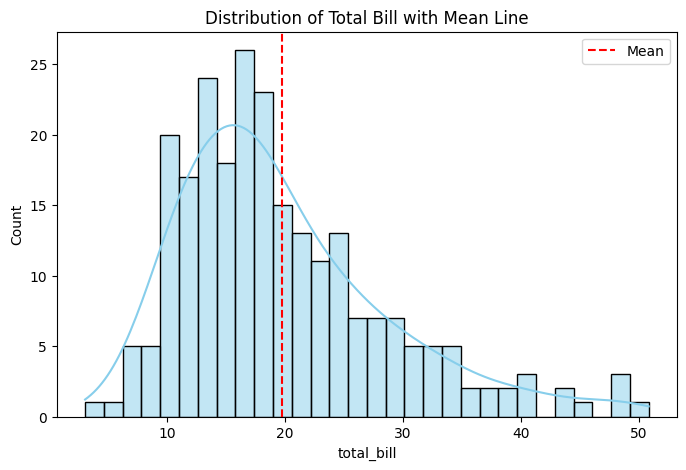

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(data, bins=30, kde=True, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.title("Distribution of Total Bill with Mean Line")
plt.legend()
plt.show()